# Warning!

This is a Notebook where I share some of my Data Science skills. The objective of this notebook is not to get the best prediction score!

# Data Analysis

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, zscore
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We drop the ``PassengerId`` column.

In [5]:
train.drop(['PassengerId'],axis=1,inplace = True)
test.drop(['PassengerId'],axis=1,inplace = True)

We set the ``Sex`` column as integer:

In [6]:
train.replace({'male':'0','female':'1'},inplace=True)
test.replace({'male':'0','female':'1'},inplace=True)

In [7]:
train['Sex'] = pd.to_numeric(train['Sex'],downcast='integer')
test['Sex'] = pd.to_numeric(test['Sex'],downcast='integer')

We make a first descriptive analysis of the columns:

In [8]:
train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891.000000,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",NaN,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,0.352413,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,0.477990,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,0.000000,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,0.000000,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,1.000000,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
train.convert_dtypes().info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    Int64  
 1   Pclass    891 non-null    Int64  
 2   Name      891 non-null    string 
 3   Sex       891 non-null    Int8   
 4   Age       714 non-null    Float64
 5   SibSp     891 non-null    Int64  
 6   Parch     891 non-null    Int64  
 7   Ticket    891 non-null    string 
 8   Fare      891 non-null    Float64
 9   Cabin     204 non-null    string 
 10  Embarked  889 non-null    string 
dtypes: Float64(2), Int64(4), Int8(1), string(4)
memory usage: 76.7 KB


In [10]:
test.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418,418.000000,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,418,NaN,NaN,NaN,NaN,363,NaN,76,3
top,NaN,"Kelly, Mr. James",NaN,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,1,NaN,NaN,NaN,NaN,5,NaN,3,270
mean,2.265550,NaN,0.363636,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,0.841838,NaN,0.481622,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,1.000000,NaN,0.000000,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,NaN,0.000000,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,NaN,1.000000,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int8   
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), int8(1), object(4)
memory usage: 70.6+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    int8   
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), int8(1), object(4)
memory usage: 29.9+ KB


In [13]:
df=pd.concat([train,test])

### $t$-test - Difference in mean age between male and female passengers

We are going to check it using the $t$-test. We define the following hypothesis test:
- **Null hypothesis** ($\mathbb{H_{0}}$):  There is no difference in the mean age between male and female passengers on the Titanic.
$$ \mu=\mu_{0}$$
- **Alternative hypothesis** ($\mathbb{H_{1}}$): There is a difference in the mean age between male and female passengers on the Titanic.
$$ \mu\neq\mu_{0}$$

In [38]:
ttest_age_sex = ttest_ind(df[df['Sex'] == 0]['Age'].dropna(),
                          df[df['Sex'] == 1]['Age'].dropna())
print("t-test - Difference in mean age between male and female passengers:")
print("t-statistic:", ttest_age_sex.statistic)
print("p-value:", ttest_age_sex.pvalue)

t-test - Difference in mean age between male and female passengers:
t-statistic: 2.060608663367138
p-value: 0.03958770007671348


### $\chi ^{2}$ test: Independence between 'Survived' and 'Pclass'


- **Null hypothesis** ($\mathbb{H_{0}}$):  Survival on the Titanic is independent of passenger class.
- **Alternative hypothesis** ($\mathbb{H_{1}}$): Survival on the Titanic is associated with passenger class.

In [40]:
chi2_survived_pclass = chi2_contingency(pd.crosstab(df['Survived'], df['Pclass']))
print("\nChi-squared test - Independence between 'Survived' and 'Pclass':")
print("Chi-squared statistic:", chi2_survived_pclass[0])
print("p-value:", chi2_survived_pclass[1])


Chi-squared test - Independence between 'Survived' and 'Pclass':
Chi-squared statistic: 102.88898875696056
p-value: 4.549251711298793e-23


### ANOVA test: Difference in mean age across passenger classes

- **Null hypothesis** ($\mathbb{H_{0}}$):  There is no difference in the mean age between male and female passengers on the Titanic.
$$ \mu=\mu_{0}$$
- **Alternative hypothesis** ($\mathbb{H_{1}}$): There is a difference in the mean age between male and female passengers on the Titanic.
$$ \mu\neq\mu_{0}$$

In [39]:
anova_age_pclass = f_oneway(df[df['Pclass'] == 1]['Age'].dropna(),
                            df[df['Pclass'] == 2]['Age'].dropna(),
                            df[df['Pclass'] == 3]['Age'].dropna())
print("\nANOVA test - Difference in mean age across passenger classes:")
print("F-statistic:", anova_age_pclass.statistic)
print("p-value:", anova_age_pclass.pvalue)


ANOVA test - Difference in mean age across passenger classes:
F-statistic: 108.32631005902482
p-value: 1.796708368328782e-43


### $z$-test: Difference in mean fare between passengers who survived and not

- **Null hypothesis** ($\mathbb{H_{0}}$):  There is no difference in the mean fare between passengers who survived and those who did not survive on the Titanic.
$$ \mu=\mu_{0}$$
- **Alternative hypothesis** ($\mathbb{H_{1}}$): There is a difference in the mean fare between passengers who survived and those who did not survive on the Titanic.
$$ \mu\neq\mu_{0}$$

In [51]:
from scipy.stats import norm
z_scores = zscore(df['Fare'].dropna())
survived_fare_mean = df[df['Survived'] == 1]['Fare'].mean()
not_survived_fare_mean = df[df['Survived'] == 0]['Fare'].mean()
ztest_survived_fare = (survived_fare_mean - not_survived_fare_mean) / (z_scores.std() / np.sqrt(len(df)))
p_value = 1-norm.cdf(ztest_survived_fare)

print('Critical region:',norm.ppf(1-0.05))
print("\nz-test - Difference in mean fare between passengers who survived and those who did not:")
print("z-statistic:", ztest_survived_fare)
print("p-value for z-test:", p_value)

Critical region: 1.6448536269514722

z-test - Difference in mean fare between passengers who survived and those who did not:
z-statistic: 950.3599635913521
p-value for z-test: 0.0


## Data Visualisation 

In [54]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

We make a histogram of the variables:

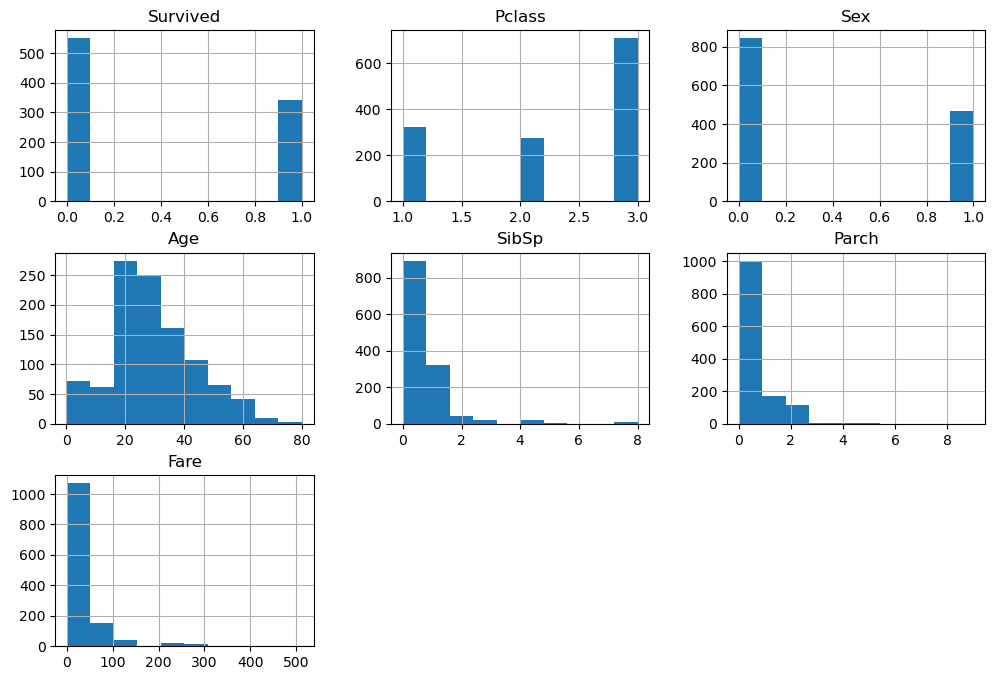

In [55]:
df.hist(figsize=(12, 8))
plt.show()

Now a scatter matrix:

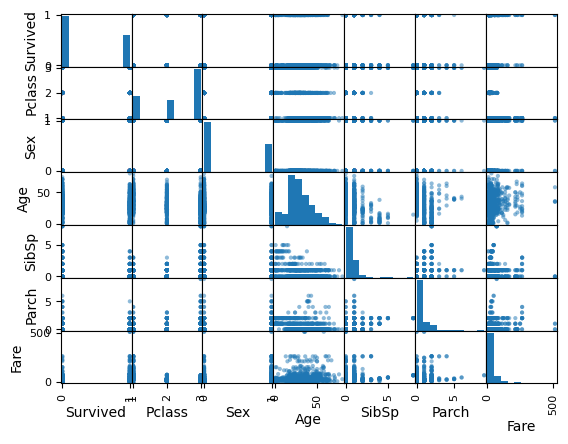

In [56]:
scatter_matrix(df)
plt.show()

Now let's see the behaviour of the different categorical variables according to the different values of the ``Survived`` variable, since it is the target column.

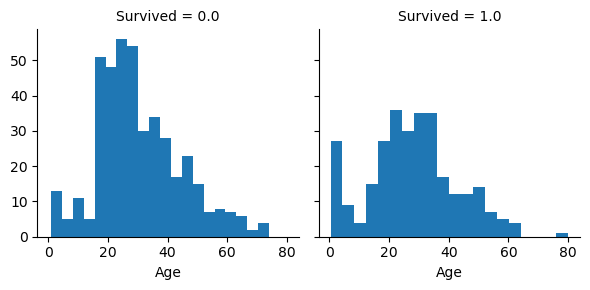

In [57]:
import seaborn as sns
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

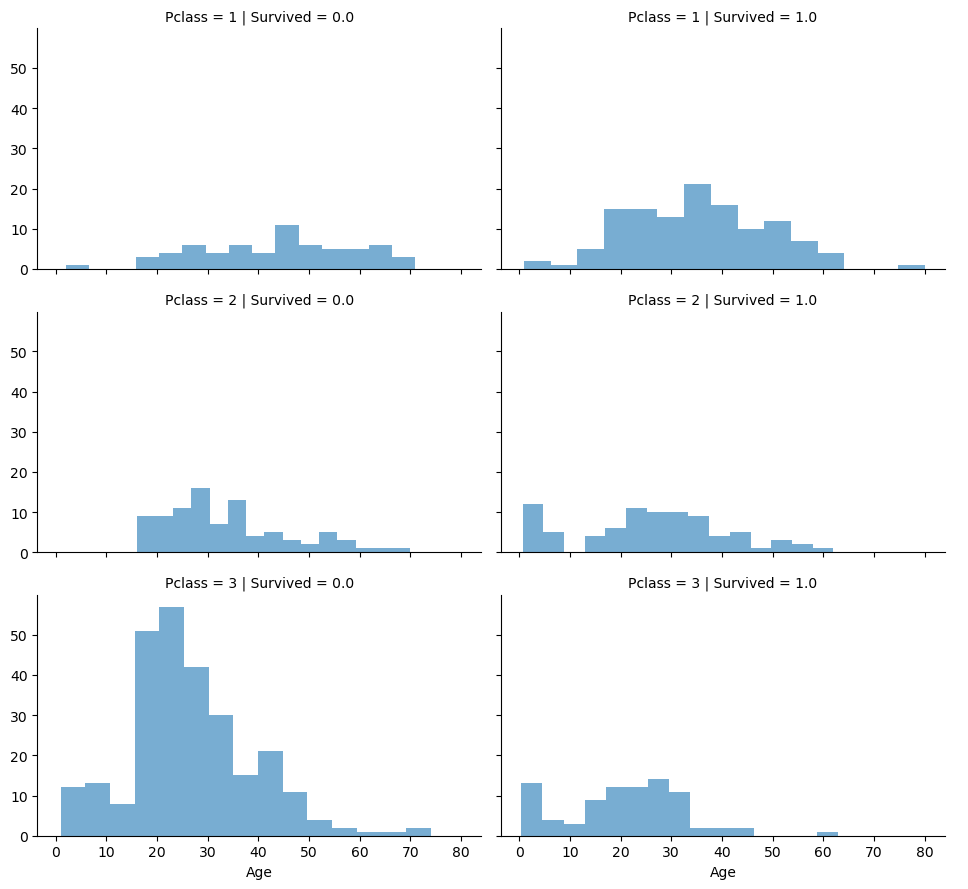

In [58]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass',  aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=15)
grid.add_legend()

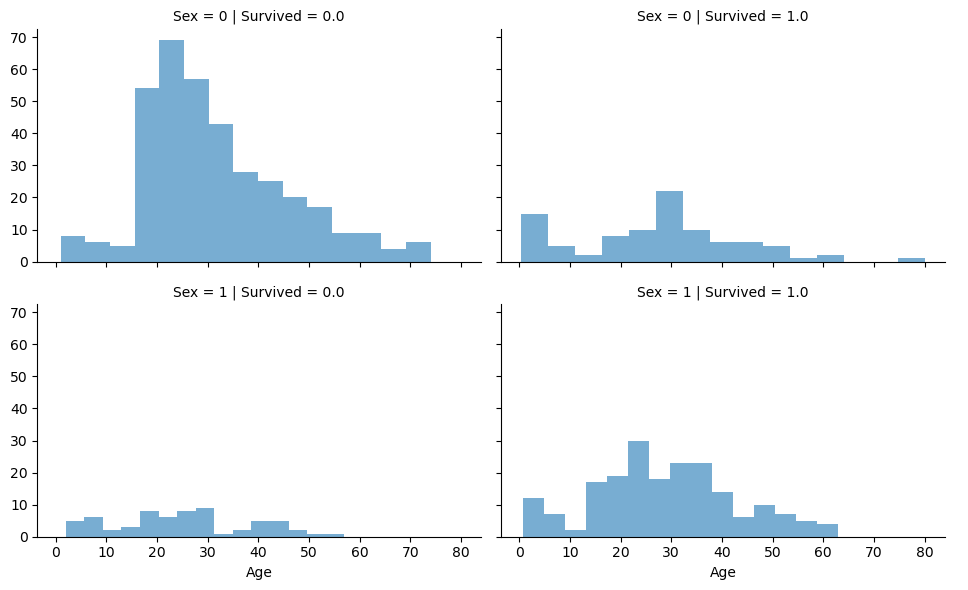

In [59]:
grid = sns.FacetGrid(df, col='Survived', row='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=15)
grid.add_legend()

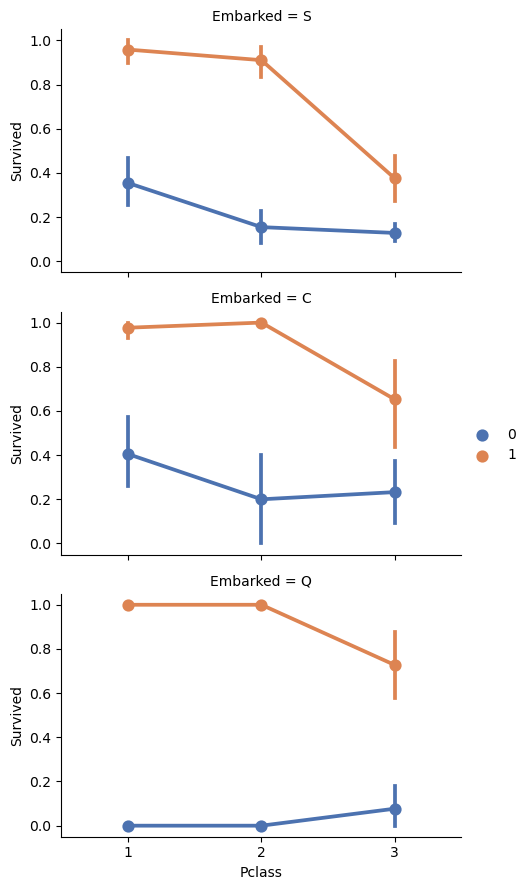

In [60]:
grid = sns.FacetGrid(df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Data processing

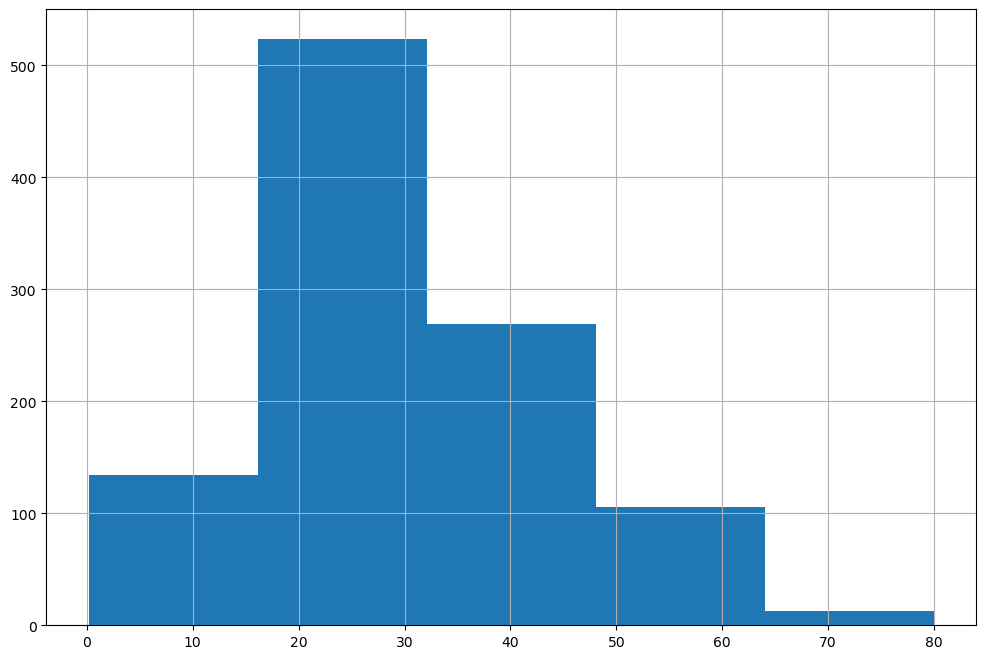

In [22]:
df['Age'].hist(bins=5,figsize=(12,8))
plt.show()

We set the age as a categorical variable:

In [23]:
df['Age'] = pd.to_numeric(pd.cut(df['Age'],bins = [0,18,32,48,64,100], labels = ['0','1','2','3','4']),downcast='integer')
#pd.cut(df['Age'],bins = 4,labels=['0-18','18-32','32-48''48-64','+64'])

In [24]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,NaN,1,"Oliva y Ocana, Dona. Fermina",1,2.0,0,0,PC 17758,108.9000,C105,C
415,NaN,3,"Saether, Mr. Simon Sivertsen",0,2.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [25]:
df[df['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
17,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S
19,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C
26,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,C
28,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
408,NaN,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,334915,7.7208,NaN,Q
410,NaN,3,"Naughton, Miss. Hannah",1,NaN,0,0,365237,7.7500,NaN,Q
413,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [26]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1.0,1,"Icard, Miss. Amelie",1,2.0,0,0,113572,80.0,B28,NaN
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,3.0,0,0,113572,80.0,B28,NaN


We drop the columns that are not useful or have a lot of missing values.

In [27]:
df.drop(['Cabin','Name','Ticket','Fare'], axis = 1, inplace = True)

In [28]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

We categorize the ``Embarked`` variable:

In [29]:
df['Embarked'].replace({'S':'0','Q':'1','C':'2'},inplace = True)

In [30]:
df['Embarked'] = pd.to_numeric(df['Embarked'],downcast='integer')
#pd.cut(df['Age'],bins = 4,labels=['0-18','18-32','32-48''48-64','+64'])

In [31]:
df.corr()['Age']

Survived   -0.061594
Pclass     -0.395428
Sex        -0.071011
Age         1.000000
SibSp      -0.221965
Parch      -0.124645
Embarked    0.076516
Name: Age, dtype: float64

In [32]:
df.iloc[:len(train),:].corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.061594
SibSp      -0.035322
Parch       0.081629
Embarked    0.169718
Name: Survived, dtype: float64

In [33]:
df.iloc[:len(train),:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,3,0,1.0,1,0,0.0
1,1.0,1,1,2.0,1,0,2.0
2,1.0,3,1,1.0,0,0,0.0
3,1.0,1,1,2.0,1,0,0.0
4,0.0,3,0,2.0,0,0,0.0
...,...,...,...,...,...,...,...
886,0.0,2,0,1.0,0,0,0.0
887,1.0,1,1,1.0,0,0,0.0
888,0.0,3,1,NaN,1,2,0.0
889,1.0,1,0,1.0,0,0,2.0


Let's input the missing values of the ``Age`` variable with different input tecniques:

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [36]:
regression_imputer = IterativeImputer(estimator=RandomForestClassifier())
lr_imp = regression_imputer.fit(np.array(df['Pclass']).reshape(-1,1),np.array(df['Age']).reshape(-1,1) )



In [37]:
df.iloc[:,[1,3]].values

array([[ 3.,  1.],
       [ 1.,  2.],
       [ 3.,  1.],
       ...,
       [ 3.,  2.],
       [ 3., nan],
       [ 3., nan]])

In [38]:
impt=lr_imp.transform(df.iloc[:,[3]].values)

In [39]:
ori=df.iloc[:,[3]].values

In [40]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
        return scores

In [41]:
impt

array([[1.        ],
       [2.        ],
       [1.        ],
       ...,
       [2.        ],
       [2.29488159],
       [2.29488159]])

In [42]:
df['Age_imputated']=impt
df['Age_imputated']=round(df['Age_imputated'])

Let's check the correlation of the different variables:

In [43]:
df.iloc[:len(train),:].corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_imputated
Survived,1.000000,-0.338481,0.543351,-0.061594,-0.035322,0.081629,0.169718,-0.081591
Pclass,-0.338481,1.000000,-0.131900,-0.365582,0.083081,0.018443,-0.164681,-0.258025
Sex,0.543351,-0.131900,1.000000,-0.100041,0.114631,0.245489,0.110320,-0.102973
Age,-0.061594,-0.365582,-0.100041,1.000000,-0.271534,-0.158422,0.029180,1.000000
SibSp,-0.035322,0.083081,0.114631,-0.271534,1.000000,0.414838,-0.068900,-0.188863
Parch,0.081629,0.018443,0.245489,-0.158422,0.414838,1.000000,-0.040449,-0.181255
Embarked,0.169718,-0.164681,0.110320,0.029180,-0.068900,-0.040449,1.000000,0.072027
Age_imputated,-0.081591,-0.258025,-0.102973,1.000000,-0.188863,-0.181255,0.072027,1.000000


In [44]:
df.drop('Age',axis=1,inplace=True)

In [45]:
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_imputated
0,0.0,3,0,1,0,0.0,1.0
1,1.0,1,1,1,0,2.0,2.0
2,1.0,3,1,0,0,0.0,1.0
3,1.0,1,1,1,0,0.0,2.0
4,0.0,3,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...
413,NaN,3,0,0,0,0.0,2.0
414,NaN,1,1,0,0,2.0,2.0
415,NaN,3,0,0,0,0.0,2.0
416,NaN,3,0,0,0,0.0,2.0


In [46]:
import pandas as pd
import re
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

### Data Modelling

Let's load the different libraries that we need. We are going to set different functions in order to perform the cross validation tecnique in different models. We are also going to create different functions for the different models. You will see that we will ajust different parameters for the different models.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [49]:
def split_val(df,leng,val=0):  
    df2 = df.dropna(axis = 0, how = 'any') # this has to be removed before
    train = df2.iloc[:train_len,:]
    y = train['Survived']
    X = train.loc[:,df2.columns != 'Survived']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val
    

In [50]:
def log_reg(df,train_len):
    X_train, X_val, y_train, y_val = split_val(df,train_len)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    Y_pred = logreg.predict(X_val)
    pred_df = pd.DataFrame({'Original':y_val,
                           'predictions':Y_pred})
    acc_log = round(logreg.score(X_val, y_val) * 100, 2)
    return pred_df,acc_log,logreg

In [51]:
# train_len = len(train)
# pred, acc_log,log_model = log_reg(df,train_len)
# print(pred)
# print(acc_log)
# print(log_reg_cross(df,train_len))

#### Cross validation

In [52]:
train_len = len(train)

In [53]:
def prepare_cross_val(df,train_len):
    df2 = df.dropna(axis = 0, how = 'any') # this has to be removed before
    train = df2.iloc[:train_len,:]
    y = train['Survived']
    X = train.loc[:,df2.columns != 'Survived']
    return X,y

In [54]:
def perform_cross_validation(model, df, train_len, cv=5):
    # Perform cross-validation
    X,y = prepare_cross_val(df,train_len)
    cv_results = cross_validate(model, X, y, cv=cv)
    scores = cv_results['test_score']
    # Calculate and print the mean accuracy and standard deviation
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    print("Mean Accuracy:", mean_accuracy)
    print("Standard Deviation:", std_accuracy)
    print("Accuracy Scores:", scores)
    print('\n')

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
models = {'Logistic Regression C30': LogisticRegression(C=30,random_state=42),
          'Logistic Regression C1': LogisticRegression(C=1,random_state=42),
          'Logistic Regression C100': LogisticRegression(C=100,random_state=42),
         'Support Vector Machines Classifier': SVC(),
         'Support Vector Machines Classifier rbf': SVC(kernel="rbf", gamma=0.1, C=5),
         'Support Vector Machines Classifier Poly 3': SVC(kernel="poly", degree=3, coef0=1, C=5),
         'Support Vector Machines Classifier Poly 2': SVC(kernel="poly", degree=2, coef0=1, C=5),
        'Bagging Classifier' : BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
max_samples=100, random_state=42), 
          'KNeighborsClassifier':  KNeighborsClassifier(n_neighbors = 2),
        'GaussianNB':  GaussianNB(),
        'LinearSVC':  LinearSVC(max_iter=5000),
        'SGDClassifier':  SGDClassifier(),
       'RandomForestClassifier':   RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
n_jobs=-1, random_state=42)
         }

In [57]:
models.values

<function dict.values>

In [58]:
for model_name,model in models.items():
    print(model_name + '\n')
    perform_cross_validation(model, df, train_len, cv=5)

Logistic Regression C30

Mean Accuracy: 0.7885482130387864
Standard Deviation: 0.014178348039910523
Accuracy Scores: [0.78651685 0.79213483 0.79213483 0.76404494 0.8079096 ]


Logistic Regression C1

Mean Accuracy: 0.790808100044436
Standard Deviation: 0.017577344062525917
Accuracy Scores: [0.78651685 0.79213483 0.79213483 0.76404494 0.81920904]


Logistic Regression C100

Mean Accuracy: 0.7885482130387864
Standard Deviation: 0.014178348039910523
Accuracy Scores: [0.78651685 0.79213483 0.79213483 0.76404494 0.8079096 ]


Support Vector Machines Classifier

Mean Accuracy: 0.8189106836792991
Standard Deviation: 0.010073965562807749
Accuracy Scores: [0.83146067 0.81460674 0.80898876 0.80898876 0.83050847]


Support Vector Machines Classifier rbf

Mean Accuracy: 0.8200469751793309
Standard Deviation: 0.014379055844577809
Accuracy Scores: [0.83146067 0.80898876 0.80337079 0.81460674 0.84180791]


Support Vector Machines Classifier Poly 3

Mean Accuracy: 0.811058211134387
Standard Deviation:

In [59]:
def log_reg_cross(df,train_len):
    X,y = prepare_cross_val(df,train_len)
    logreg = LogisticRegression()
    cv_results = cross_validate(logreg, X, y, cv=3)
    sorted(cv_results.keys())
    return cv_results['test_score'],cv_results['test_score'].mean()

Now we are going to encode our data for the previous models. We will see that this functions better. 

In [60]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [118]:
survived = df['Survived']
df_prenc = df.drop(columns=['Survived'])

In [119]:
df_prenc[df_prenc.Embarked.isna()]

,Pclass,Sex,SibSp,Parch,Embarked,Age_imputated
61,1,1,0,0,NaN,2.0
829,1,1,0,0,NaN,3.0


In [126]:
df_prenc.Embarked.value_counts()

0.0    914
2.0    270
1.0    123
Name: Embarked, dtype: int64

In [128]:
df_prenc.Embarked[df_prenc.Embarked.isna()] = df_prenc.Embarked.value_counts().index[0]

/tmp/ipykernel_32/2517738079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prenc.Embarked[df_prenc.Embarked.isna()] = df_prenc.Embarked.value_counts().index[0]


In [129]:
df_prenc[df_prenc.Embarked.isna()]

,Pclass,Sex,SibSp,Parch,Embarked,Age_imputated


In [146]:

df_no_na = df_prenc.dropna(axis = 0, how = 'any').reset_index(drop=True)
features_to_encode= df_no_na.columns[df_no_na.columns != 'Survived']
df_to_encode = df_no_na[features_to_encode]

In [134]:
#df_to_encode['Survived']=survived.values

In [147]:
df_to_encode

,Pclass,Sex,SibSp,Parch,Embarked,Age_imputated
0,3,0,1,0,0.0,1.0
1,1,1,1,0,2.0,2.0
2,3,1,0,0,0.0,1.0
3,1,1,1,0,0.0,2.0
4,3,0,0,0,0.0,2.0
...,...,...,...,...,...,...
1304,3,0,0,0,0.0,2.0
1305,1,1,0,0,2.0,2.0
1306,3,0,0,0,0.0,2.0
1307,3,0,0,0,0.0,2.0


In [136]:
'''
df_no_na = df.iloc[:len(train),:].dropna(axis = 0, how = 'any').reset_index(drop=True)
features_to_encode= df_no_na.columns[df_no_na.columns != 'Survived']
df_to_encode = df_no_na[features_to_encode]
'''

"\ndf_no_na = df.iloc[:len(train),:].dropna(axis = 0, how = 'any').reset_index(drop=True)\nfeatures_to_encode= df_no_na.columns[df_no_na.columns != 'Survived']\ndf_to_encode = df_no_na[features_to_encode]\n"

In [141]:
features_to_encode

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_imputated'], dtype='object')

## Pipeline code

In [148]:
#preproc = PrepProcesor()
#numeric_pipeline = Pipeline([('Scaler', StandardScaler())]) 
#categorical_pipeline = Pipeline([('OneHot', OneHotEncoder(handle_unknown='ignore'))])
#transformer = ColumnTransformer([('num', numeric_pipeline, ['Pclass','Age','SibSp','Parch','Fare','CabinNumber']), ('cat', categorical_pipeline, ['Sex','Embarked','CabinClass'])]) 

In [150]:
stsc = StandardScaler()
scaler = OrdinalEncoder()
dfs_scaled = []
encoded_features = scaler.fit_transform(df_to_encode)
df_encoded = pd.DataFrame(encoded_features, columns=scaler.get_feature_names_out(features_to_encode))
df_encoded['Survived']=survived.values
dfs_scaled.append(df_encoded)

In [151]:
print(dfs_scaled[0])

      Pclass  Sex  SibSp  Parch  Embarked  Age_imputated  Survived
0        2.0  0.0    1.0    0.0       0.0            1.0       0.0
1        0.0  1.0    1.0    0.0       2.0            2.0       1.0
2        2.0  1.0    0.0    0.0       0.0            1.0       1.0
3        0.0  1.0    1.0    0.0       0.0            2.0       1.0
4        2.0  0.0    0.0    0.0       0.0            2.0       0.0
...      ...  ...    ...    ...       ...            ...       ...
1304     2.0  0.0    0.0    0.0       0.0            2.0       NaN
1305     0.0  1.0    0.0    0.0       2.0            2.0       NaN
1306     2.0  0.0    0.0    0.0       0.0            2.0       NaN
1307     2.0  0.0    0.0    0.0       0.0            2.0       NaN
1308     2.0  0.0    1.0    1.0       2.0            2.0       NaN

[1309 rows x 7 columns]


In [153]:
scaler =  OneHotEncoder(sparse_output=False)
encoded_features = scaler.fit_transform(df_to_encode)
df_encoded = pd.DataFrame(encoded_features, columns=scaler.get_feature_names_out(features_to_encode))
df_encoded['Survived']=survived.values
dfs_scaled.append(df_encoded)

In [154]:
dfs_scaled[1].shape,dfs_scaled[0].shape

((1309, 29), (1309, 7))

In [155]:
dfs_scaled[0]

,Pclass,Sex,SibSp,Parch,Embarked,Age_imputated,Survived
0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,2.0,2.0,1.0
2,2.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,1.0,0.0,0.0,2.0,1.0
4,2.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...
1304,2.0,0.0,0.0,0.0,0.0,2.0,NaN
1305,0.0,1.0,0.0,0.0,2.0,2.0,NaN
1306,2.0,0.0,0.0,0.0,0.0,2.0,NaN
1307,2.0,0.0,0.0,0.0,0.0,2.0,NaN


In [156]:
dfs_scaled[1]

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_9,Embarked_0.0,Embarked_1.0,Embarked_2.0,Age_imputated_0.0,Age_imputated_1.0,Age_imputated_2.0,Age_imputated_3.0,Age_imputated_4.0,Survived
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1305,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
1306,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1307,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [71]:
def perform_cross_validation2(model, df, train_len, cv=5):
    # Perform cross-validation
    X,y = df[:,1:],df[:,0]
    cv_results = cross_validate(model, X, y, cv=cv)
    scores = cv_results['test_score']
    # Calculate and print the mean accuracy and standard deviation
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    print("Mean Accuracy:", mean_accuracy)
    print("Standard Deviation:", std_accuracy)
    print("Accuracy Scores:", scores)
    print('\n')

In [157]:
for model_name,model in models.items():
     for df_scaled in dfs_scaled:
        print(model_name + '\n')
        perform_cross_validation(model, df_scaled, train_len, cv=5)

Logistic Regression C30

Mean Accuracy: 0.7912497646098802
Standard Deviation: 0.010805340843469052
Accuracy Scores: [0.7877095  0.79213483 0.79213483 0.7752809  0.80898876]


Logistic Regression C30



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Accuracy: 0.8036030381018142
Standard Deviation: 0.009130679420028523
Accuracy Scores: [0.79329609 0.80898876 0.79213483 0.80898876 0.81460674]


Logistic Regression C1

Mean Accuracy: 0.7934969556211161
Standard Deviation: 0.014720078147382541
Accuracy Scores: [0.7877095  0.79213483 0.79213483 0.7752809  0.82022472]


Logistic Regression C1

Mean Accuracy: 0.7979976147134517
Standard Deviation: 0.010873570114529604
Accuracy Scores: [0.78212291 0.80337079 0.79775281 0.79213483 0.81460674]


Logistic Regression C100

Mean Accuracy: 0.7912497646098802
Standard Deviation: 0.010805340843469052
Accuracy Scores: [0.7877095  0.79213483 0.79213483 0.7752809  0.80898876]


Logistic Regression C100



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Accuracy: 0.8036030381018142
Standard Deviation: 0.009130679420028523
Accuracy Scores: [0.79329609 0.80898876 0.79213483 0.80898876 0.81460674]


Support Vector Machines Classifier

Mean Accuracy: 0.8170422446801833
Standard Deviation: 0.012332447194715804
Accuracy Scores: [0.83240223 0.80898876 0.80337079 0.80898876 0.83146067]


Support Vector Machines Classifier

Mean Accuracy: 0.815956311593748
Standard Deviation: 0.014979093224406808
Accuracy Scores: [0.79888268 0.80898876 0.82022472 0.80898876 0.84269663]


Support Vector Machines Classifier rbf

Mean Accuracy: 0.8204130311970372
Standard Deviation: 0.014798410202313844
Accuracy Scores: [0.83240223 0.80898876 0.80337079 0.81460674 0.84269663]


Support Vector Machines Classifier rbf

Mean Accuracy: 0.8114619295712762
Standard Deviation: 0.015942983922316124
Accuracy Scores: [0.79888268 0.80898876 0.82022472 0.79213483 0.83707865]


Support Vector Machines Classifier Poly 3

Mean Accuracy: 0.80585022911305
Standard Deviation:

# Deep Learning models 

In [158]:
from sklearn.neural_network import MLPClassifier

In [159]:
model_name = 'Neural Network Sklearn'
model = MLPClassifier(random_state=1,hidden_layer_sizes = [100,100,100] ,
                      solver = 'adam',activation = 'logistic',
                      alpha = 0.01,tol=1e-8,max_iter=1000)
for df_scaled in dfs_scaled:
    print(model_name + '\n')
    perform_cross_validation(model, df_scaled, train_len, cv=5)

Neural Network Sklearn

Mean Accuracy: 0.7822986629841191
Standard Deviation: 0.01885028849588977
Accuracy Scores: [0.75418994 0.78651685 0.79213483 0.76966292 0.80898876]


Neural Network Sklearn

Mean Accuracy: 0.6878789780930262
Standard Deviation: 0.08806826865476522
Accuracy Scores: [0.7877095  0.61797753 0.61797753 0.80337079 0.61235955]




In [75]:
df2 = df.dropna(axis = 0, how = 'any') # this has to be removed before
train = df2.iloc[:train_len,:]
y = train['Survived'].values
X = train.loc[:,df2.columns != 'Survived'].values
cv_results = cross_validate(model, X, y, cv=5)
scores = cv_results['test_score']
# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation:", std_accuracy)
print("Accuracy Scores:", scores)
print('\n')

Mean Accuracy: 0.7896718085444043
Standard Deviation: 0.013743576683502552
Accuracy Scores: [0.7752809  0.78651685 0.80337079 0.7752809  0.8079096 ]




## Tensorflow

In [76]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [160]:
df_onehotencoded = dfs_scaled[1]

In [161]:
train_encoded = df_onehotencoded.iloc[:len(train),:]

In [162]:
y = train_encoded['Survived'].values
X = train_encoded.loc[:,train_encoded.columns != 'Survived'].values

In [163]:
from sklearn.model_selection import KFold

In [164]:
kf = KFold(n_splits=3)


In [165]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(100, activation="sigmoid", input_dim=X.shape[1]),
tf.keras.layers.Dense(50, activation="sigmoid"),
tf.keras.layers.Dense(25, activation="sigmoid"),
tf.keras.layers.Dense(1, activation="sigmoid")
])

In [166]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=X.shape[1]),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(500, activation="relu"),
tf.keras.layers.Dropout(rate=0.1),
tf.keras.layers.Dense(250, activation="relu"),
tf.keras.layers.Dropout(rate=0.1),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dropout(rate=0.1),
tf.keras.layers.Dense(50, activation="relu"),
tf.keras.layers.Dropout(rate=0.1),
tf.keras.layers.Dense(25, activation="relu"),
tf.keras.layers.Dropout(rate=0.1),
tf.keras.layers.Dense(10, activation="relu"),
tf.keras.layers.Dropout(rate=0.1),
tf.keras.layers.Dense(1, activation="sigmoid")
])

In [167]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

#### Train - validation

In [168]:
# Split the data into training and combined validation-test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the combined validation-test set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train.reshape((-1,1)), epochs=20, validation_data=( X_val, y_val.reshape((-1,1))),batch_size=2)

Epoch 1/20
284/284 [==============================] - 3s 5ms/step - loss: 0.5372 - accuracy: 0.7606 - val_loss: 0.6148 - val_accuracy: 0.7552
Epoch 2/20
284/284 [==============================] - 1s 4ms/step - loss: 0.4709 - accuracy: 0.8028 - val_loss: 0.5025 - val_accuracy: 0.7762
Epoch 3/20
284/284 [==============================] - 1s 4ms/step - loss: 0.4525 - accuracy: 0.8257 - val_loss: 0.5065 - val_accuracy: 0.7762
Epoch 4/20
284/284 [==============================] - 1s 4ms/step - loss: 0.4231 - accuracy: 0.8380 - val_loss: 0.6460 - val_accuracy: 0.7552
Epoch 5/20
284/284 [==============================] - 1s 4ms/step - loss: 0.4242 - accuracy: 0.8292 - val_loss: 0.4996 - val_accuracy: 0.7552
Epoch 6/20
284/284 [==============================] - 1s 4ms/step - loss: 0.3969 - accuracy: 0.8468 - val_loss: 0.5063 - val_accuracy: 0.7622
Epoch 7/20
284/284 [==============================] - 1s 4ms/step - loss: 0.4227 - accuracy: 0.8327 - val_loss: 0.4919 - val_accuracy: 0.7902
Epoch 

In [169]:
y_pred = history.model.predict(X_test).round()

6/6 [==============================] - 0s 3ms/step


In [170]:
from sklearn.metrics import accuracy_score,r2_score

In [171]:
accuracy_score(y_test,y_pred)

0.8089887640449438

#### K-fold Cross Validation

In [172]:
kf = KFold(n_splits=5,shuffle= True)


In [173]:
acc = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_val, y_train, y_val = train_test_split(X[train_index], y[train_index], test_size=0.2, random_state=42)
    print(f"Fold {i}:")
    history = model.fit( X_train, y_train.reshape((-1,1)), epochs=20, batch_size = 2,validation_data=(X_val, y_val.reshape((-1,1))))
    y_pred = history.model.predict(X[test_index]).round()
    print(f'Accuracy Fold {i}: ',accuracy_score(y[test_index],y_pred))
    acc.append(accuracy_score(y[test_index],y_pred))

Fold 0:
Epoch 1/20
284/284 [==============================] - 1s 5ms/step - loss: 0.4284 - accuracy: 0.8345 - val_loss: 0.4301 - val_accuracy: 0.8252
Epoch 2/20
284/284 [==============================] - 1s 4ms/step - loss: 0.3769 - accuracy: 0.8380 - val_loss: 0.4032 - val_accuracy: 0.8112
Epoch 3/20
284/284 [==============================] - 1s 4ms/step - loss: 0.3776 - accuracy: 0.8521 - val_loss: 0.4197 - val_accuracy: 0.8112
Epoch 4/20
284/284 [==============================] - 1s 4ms/step - loss: 0.3685 - accuracy: 0.8433 - val_loss: 0.4287 - val_accuracy: 0.8392
Epoch 5/20
284/284 [==============================] - 1s 4ms/step - loss: 0.3466 - accuracy: 0.8415 - val_loss: 0.5324 - val_accuracy: 0.8322
Epoch 6/20
284/284 [==============================] - 1s 4ms/step - loss: 0.3548 - accuracy: 0.8415 - val_loss: 0.4542 - val_accuracy: 0.8322
Epoch 7/20
284/284 [==============================] - 1s 4ms/step - loss: 0.3512 - accuracy: 0.8468 - val_loss: 0.4409 - val_accuracy: 0.832

In [174]:
acc

[0.8146067415730337,
 0.8089887640449438,
 0.8426966292134831,
 0.8651685393258427,
 0.847457627118644]

In [175]:
np.array(acc).mean()

0.8357836602551896

We can see that the neural network is the model has better accuracy, so it will be the chosen for the delivery.

# Predicting the test dataset

In [176]:
df_onehotencoded.iloc[len(train):,:] 

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_9,Embarked_0.0,Embarked_1.0,Embarked_2.0,Age_imputated_0.0,Age_imputated_1.0,Age_imputated_2.0,Age_imputated_3.0,Age_imputated_4.0,Survived
889,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
890,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
891,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
892,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
893,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1305,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
1306,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1307,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [177]:
test = df_onehotencoded.iloc[train_len:,:] 

In [178]:
test

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_9,Embarked_0.0,Embarked_1.0,Embarked_2.0,Age_imputated_0.0,Age_imputated_1.0,Age_imputated_2.0,Age_imputated_3.0,Age_imputated_4.0,Survived
891,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
892,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
893,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
894,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
895,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1305,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
1306,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1307,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [179]:

Xtest = test.loc[:,df_onehotencoded.columns != 'Survived']

In [182]:
Xtest

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_6,Parch_9,Embarked_0.0,Embarked_1.0,Embarked_2.0,Age_imputated_0.0,Age_imputated_1.0,Age_imputated_2.0,Age_imputated_3.0,Age_imputated_4.0
891,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
892,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
893,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
894,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
895,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1305,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1306,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1307,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [186]:
predictions = history.model.predict(Xtest).round()

14/14 [==============================] - 0s 2ms/step


In [207]:
submission=pd.Series(index=Xtest.index,data=predictions.reshape(len(predictions)))

In [208]:
print(submission) 

891    0.0
892    1.0
893    0.0
894    0.0
895    0.0
dtype: float32